In [1]:
import pickle
with open('AmazonMusic_data.pkl', 'rb') as file:
    dataset = pickle.load(file)

dataset.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.153476,-1.511128,-0.757909,-0.427109,1.616187,-0.353338,0.538584,0.321287,0.515005,-0.401735
1,-1.028518,-1.528056,-1.098629,-0.369741,1.604081,-0.353405,-0.521537,-0.577455,-1.294487,0.124906
2,-0.488051,-1.418027,-1.127899,-0.398062,1.622240,-0.353405,1.039046,-0.375943,-1.560003,-0.003949
3,0.573581,-0.313510,-0.470677,-0.013914,1.610134,-0.353405,-0.031836,0.611464,0.405268,-0.397437
4,0.406294,-1.028695,-0.768227,-0.111948,1.610134,-0.353405,0.796887,1.087031,-1.377593,-0.346143


In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(dataset)
    sse.append(km.inertia_)

sse

[958370.0000000002,
 778813.5948784597,
 658335.9621683137,
 593031.0894267297,
 548600.50177525,
 521625.8732626643,
 494731.167673613,
 470850.5503293433,
 449763.55633500527,
 437505.4234841664]

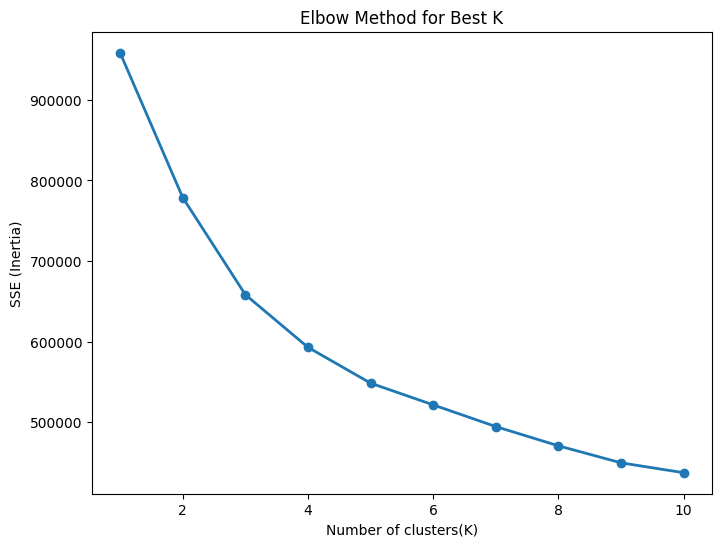

In [3]:
plt.figure(figsize=(8,6))
plt.plot(k_range, sse, 'o-',linewidth=2)
plt.xlabel('Number of clusters(K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Best K')
plt.show()

In [4]:
## Use sample for finding Silhouette Score
import numpy as np
sample_index = np.random.choice(dataset.shape[0], 5000, replace=False)
sample_data = dataset.iloc[sample_index]
sample_data.shape

(5000, 10)

In [5]:
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(sample_data)
    score = silhouette_score(sample_data, km.labels_)
    print(f"K : {k}  |  Silhouette_score : {score:.4f}")

K : 2  |  Silhouette_score : 0.2006
K : 3  |  Silhouette_score : 0.2453
K : 4  |  Silhouette_score : 0.2348
K : 5  |  Silhouette_score : 0.2332
K : 6  |  Silhouette_score : 0.1885
K : 7  |  Silhouette_score : 0.1921
K : 8  |  Silhouette_score : 0.1650
K : 9  |  Silhouette_score : 0.1720
K : 10  |  Silhouette_score : 0.1480


### Interpretation
##### Silhouette score tells us how well each point fits into its cluster where higher score is better.
##### The highest score is at K = 3 (0.2453)

In [6]:
best_k = 3
km = KMeans(n_clusters=best_k, random_state=42)
labels = km.fit_predict(dataset)
dataset['Labels'] = labels
dataset

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Labels
0,-0.153476,-1.511128,-0.757909,-0.427109,1.616187,-0.353338,0.538584,0.321287,0.515005,-0.401735,0
1,-1.028518,-1.528056,-1.098629,-0.369741,1.604081,-0.353405,-0.521537,-0.577455,-1.294487,0.124906,0
2,-0.488051,-1.418027,-1.127899,-0.398062,1.622240,-0.353405,1.039046,-0.375943,-1.560003,-0.003949,0
3,0.573581,-0.313510,-0.470677,-0.013914,1.610134,-0.353405,-0.031836,0.611464,0.405268,-0.397437,0
4,0.406294,-1.028695,-0.768227,-0.111948,1.610134,-0.353405,0.796887,1.087031,-1.377593,-0.346143,0
...,...,...,...,...,...,...,...,...,...,...,...
95832,0.560713,0.113908,0.800599,-0.464870,-1.038056,-0.353405,-0.322428,0.264864,1.608703,-0.288165,1
95833,-0.378671,0.558254,1.372746,-0.499000,-0.956340,-0.353405,-0.678133,-1.117507,0.414907,0.485036,1
95834,0.142494,-2.217003,-3.877872,-0.184566,1.625267,3.832648,-0.629163,1.272422,-1.620420,-1.072017,0
95835,-0.159910,-2.149717,-3.241498,-0.239029,1.625267,3.781021,-0.613019,-0.758816,-1.783486,-0.199419,0


In [8]:
dataset['Labels'].value_counts()

Labels
1    52560
0    30762
2    12515
Name: count, dtype: int64

In [9]:
km.cluster_centers_

array([[-0.64833254, -0.97494018, -0.64399559, -0.39490289,  0.88084544,
         0.37386832, -0.23084038, -0.65073924, -0.18589226,  0.12530037],
       [ 0.25973562,  0.64372722,  0.53628308, -0.34050353, -0.60525252,
        -0.13546034, -0.13482883,  0.37025656,  0.24359574,  0.1514859 ],
       [ 0.49811802, -0.31528796, -0.67525149,  2.40021142,  0.38430891,
        -0.34744971,  1.13306451,  0.03934024, -0.56825007, -0.94424044]])

C:\Users\arune\AppData\Local\Temp\ipykernel_8844\3986772820.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


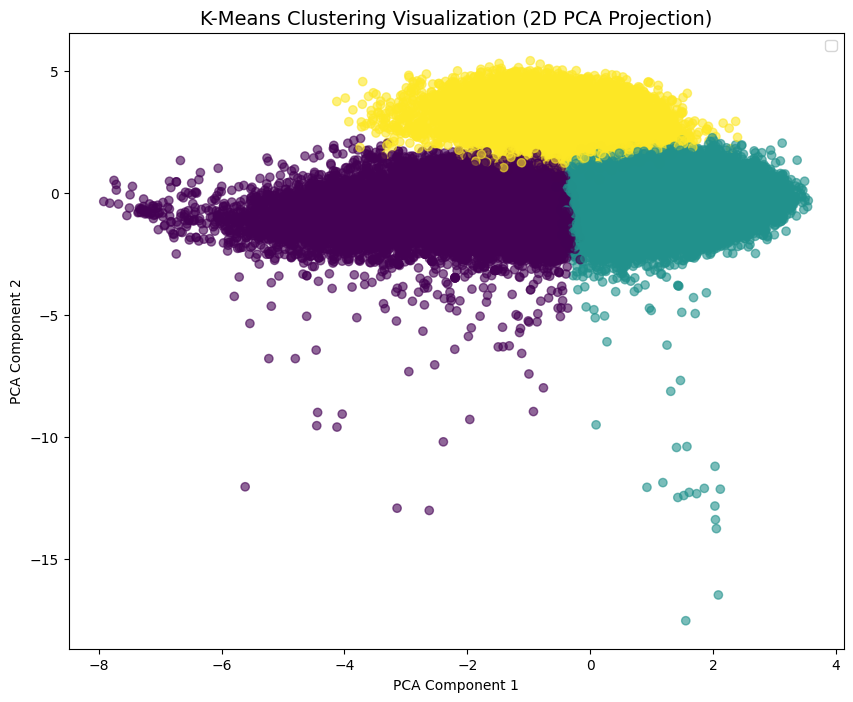

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(dataset)

plt.figure(figsize=(10,8))
plt.scatter(df_pca[:,0], df_pca[:,1], c=labels,cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering Visualization (2D PCA Projection)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_score = silhouette_score(dataset, labels)
davies_score = davies_bouldin_score(dataset, labels)
inertia = km.inertia_

print(f"KMeans Silhouette score : {sil_score:.4f}")
print(f"Kmeans davies bouldin score : {davies_score:.4f}")
print(f"Kmeans Inertia : {inertia:2f}")

KMeans Silhouette score : 0.2657
Kmeans davies bouldin score : 1.4568
Kmeans Inertia : 658335.962168


### Insights
##### Silhouette is positive → This clusters are somewhat meaningful.
##### DB index < 2 → clusters are reasonably separated.
##### Inertia alone isn’t enough, but combined with silhouette/DB score, it confirms clusters are moderately compact.

In [14]:
cluster_summary = dataset.groupby('Labels').mean().round(2)
print("\nCluster Feature Summary:")
print(cluster_summary)

for cluster, row in cluster_summary.iterrows():
    top_features = row.sort_values(ascending=False).head(3).index.tolist()
    print(f"Cluster {cluster} → Dominant features: {', '.join(top_features)}")


Cluster Feature Summary:
        danceability  energy  loudness  speechiness  acousticness  \
Labels                                                              
0              -0.65   -0.97     -0.64        -0.39          0.88   
1               0.26    0.64      0.54        -0.34         -0.61   
2               0.50   -0.32     -0.68         2.40          0.38   

        instrumentalness  liveness  valence  tempo  duration_ms  
Labels                                                           
0                   0.37     -0.23    -0.65  -0.19         0.13  
1                  -0.14     -0.13     0.37   0.24         0.15  
2                  -0.35      1.13     0.04  -0.57        -0.94  
Cluster 0 → Dominant features: acousticness, instrumentalness, duration_ms
Cluster 1 → Dominant features: energy, loudness, valence
Cluster 2 → Dominant features: speechiness, liveness, danceability


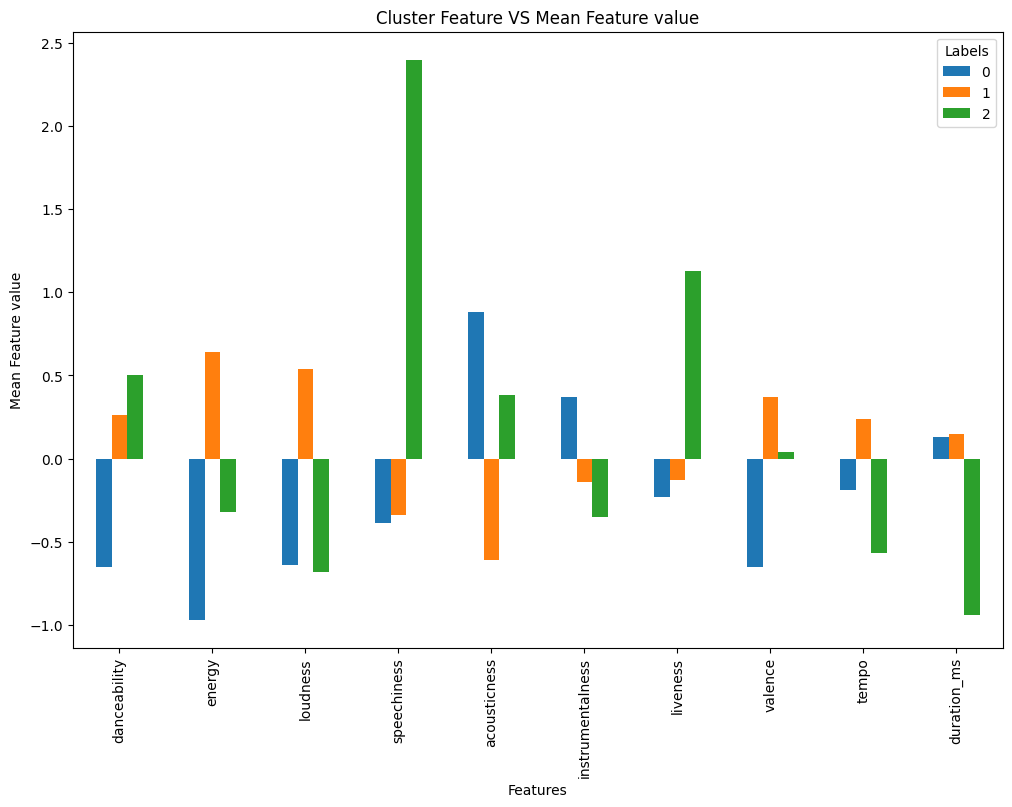

In [15]:
### Bar diagram for this Cluster
cluster_summary.T.plot(kind='bar', figsize=(12,8))
plt.title("Cluster Feature VS Mean Feature value")
plt.xlabel('Features')
plt.ylabel('Mean Feature value')
plt.show()

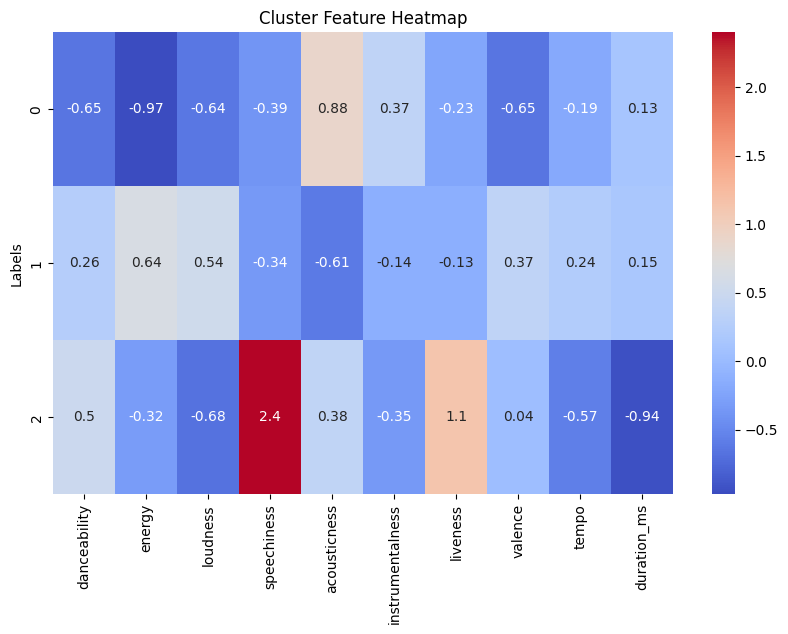

In [16]:
### HeatMap
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm')
plt.title("Cluster Feature Heatmap")
plt.show()